In [1]:
# --- Standard libraries
import pickle as pkl
import numpy as np
# --- PyTorch
import torch
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx
# --- NetworkX
import networkx as nx
# --- RDKit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 300,300
# --- Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# --- Modules from local files
from GNN.GNN_mol import GNN
from new_dataset import XASDataset_atom
from utils.train import train_model
from utils.test import test_model
from utils.utils import plot_learning_curve

In [2]:
# --- Path raw directory containing the data
path = "./"
# --- Load and create the dataset
dataset = XASDataset_atom(path)

Processing...


Total number of molecules 317


Done!


In [3]:
dataset

XASDataset_atom(317)

In [4]:
dataset[0]

Data(x=[29, 5], edge_index=[2, 70], edge_attr=[70, 3], y=[29, 200], pos=[29, 3], z=[29], idx=[1], smiles='c12[c:2]3[c:1]([H:39])[c:23]([O:26][H:33])[c:22]4[c:20]1[c:16]1[c:12]5[c:8]6[c:4]2[C:6]([H:42])([C:5]([O:24][H:34])=[C:3]3[H:38])[C:7]([H:29])=[C:9]([O:25][H:32])[C:10]6([H:35])[C:11]([H:30])=[C:13]([H:31])[C:14]5=[C:15]([H:37])[C:17](=[O:28])[C:18]1([H:36])[C:19](=[O:27])[C:21]4([H:40])[H:41]')

In [9]:
print(dataset[0].smiles)
smiles = dataset[0].smiles

c12[c:2]3[c:1]([H:32])[c:25]([H:41])[c:24]4[c:22]1[c:17]1[c:19]([c:20]([H:39])[c:23]4[H:40])[C:18]([C:21](=[O:26])[O:27][H:42])=[C:16]([H:38])[C:15]4=[C:14]([H:37])[C:12]([H:36])=[C:11]5[C:9]([O:30][H:44])([C:4]2([H:47])[C:6]([O:31][H:46])([C:5]([C:8](=[O:28])[O:29][H:43])=[C:3]3[H:33])[C:7]([H:34])=[C:10]5[H:35])[C:13]41[H:45]


In [10]:
dataset[0].x[4]

tensor([6., 3., 0., 2., 1.])

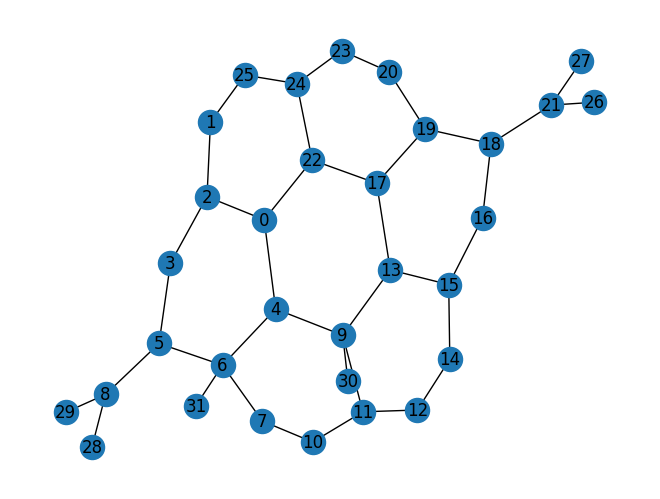

In [11]:
mol_graph = to_networkx(dataset[0], to_undirected=True)
nx.draw(mol_graph, with_labels=True)

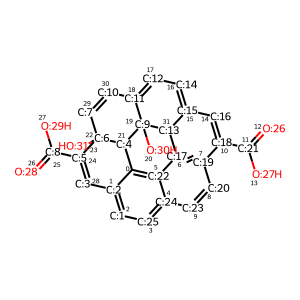

In [12]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
mol = Chem.MolFromSmiles(dataset[0].smiles)
mol

In [13]:
import json
import codecs

# --- Load the raw data from json file
dat = codecs.open('./raw/data_coronene_new.json', 'r', encoding='utf-8')
dictionaires = json.load(dat)

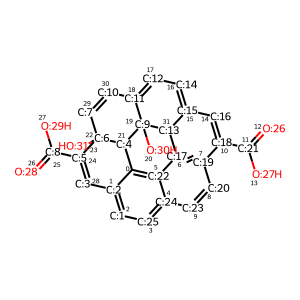

In [14]:
name = 'R_eOH_0_eCOOH__2_eEPOXY_0_eCHO_0_eKETO_0_iOH_2_iEPOXY_0_ieEPOXY_0_0'
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
mol = Chem.MolFromSmiles(dictionaires[0][name][0])
mol

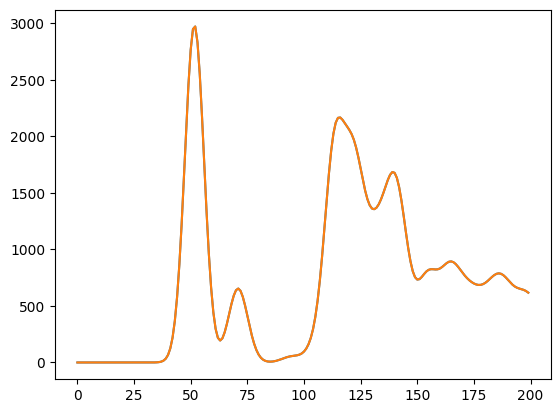

In [16]:
plt.plot(dictionaires[1][name]['19'])
plt.plot(dataset[0].y[19])
plt.show()